---

# **Import Libraries**

In [12]:
!pip install csaps
!pip install symfit

In [13]:
from __future__ import print_function

import sklearn
import scipy
import pandas as pd
import numpy as np
import seaborn as sns
import IPython
import matplotlib
import os
import cv2
import csv

from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import LabelEncoder, StandardScaler, SplineTransformer, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.decomposition import PCA
from sklearn.base import TransformerMixin
from sklearn.compose import TransformedTargetRegressor
from scipy.linalg import pinv
from scipy.interpolate import BSpline
from sympy import diff, solve, pi
from symfit import parameters, variables, Fit, Piecewise, Eq, Model
from csaps import csaps
from matplotlib import pyplot as plt
from matplotlib.cm import viridis
from matplotlib.colors import Normalize

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


---

# **Section 1)**


## Sin(x) and Noise

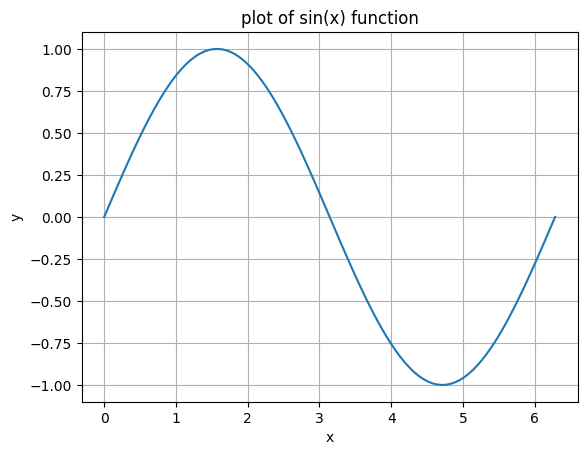

In [15]:
# Set random seed based on previous HomeWorks
np.random.seed(42)

# generate the range of x values in range 0 to 2*pi
num_points = 100
x = np.linspace(0, 2*np.pi, num_points)

# generate the sin(x) function and y values
y = np.sin(x)

# display the sin function
plt.plot(x, y)
plt.title('plot of sin(x) function')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

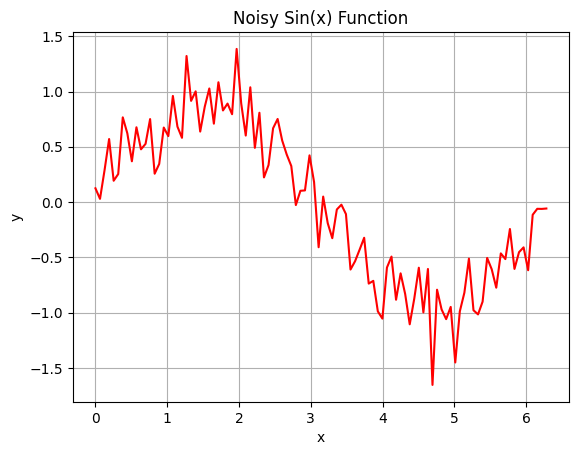

In [16]:
# normal noise
normal_noise = 0.25 * np.random.normal(size=len(x))

# add the normal noise to y
y_noise = y + normal_noise

# display the noisy sin(x)
plt.plot(x, y_noise, color='r')
plt.title('Noisy Sin(x) Function')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

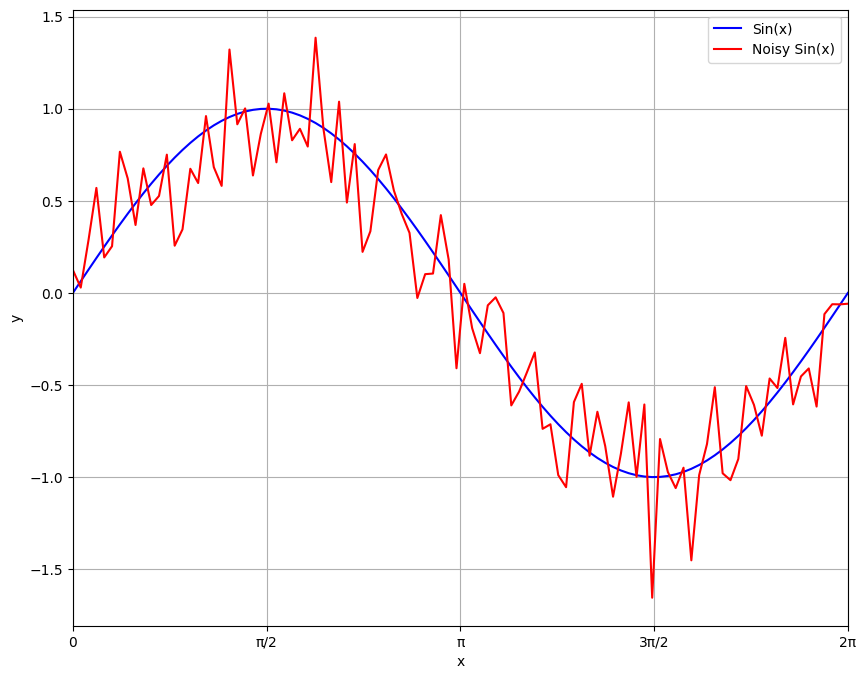

In [17]:
# display both Sin(x) and Noisy Sin(x) in one plot
plt.figure(figsize=(10,8))
plt.plot(x, y, color='b', label='Sin(x)')
plt.plot(x, y_noise, color='r', label='Noisy Sin(x)')
plt.legend()
plt.grid()
plt.xlabel('x')
plt.xlim(0, 2*np.pi)
plt.xticks(np.arange(0, 2*np.pi + np.pi/2, np.pi/2),
           ['0', 'π/2', 'π', '3π/2', '2π'])
plt.ylabel('y')
plt.show()

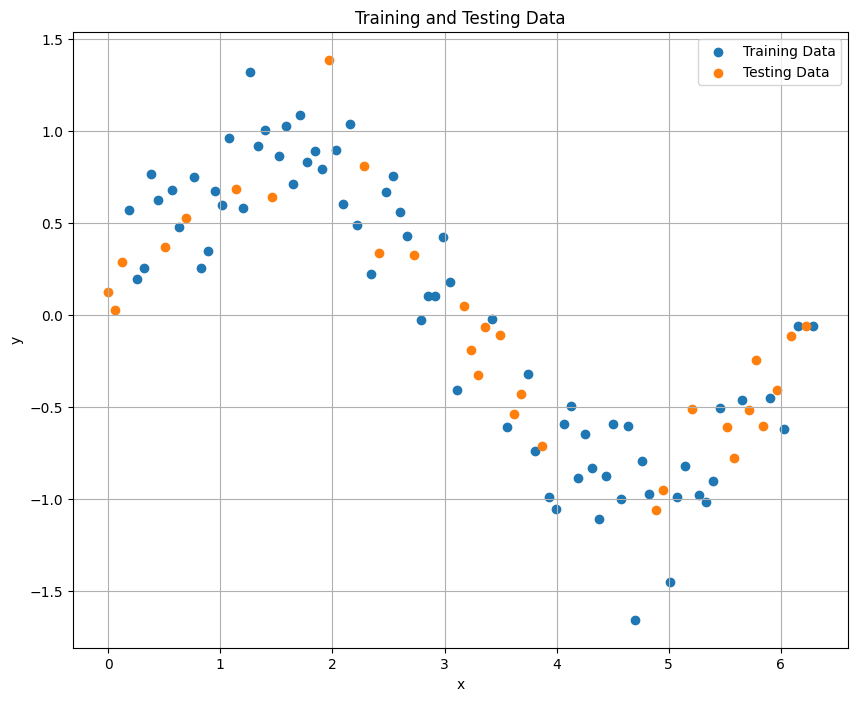

In [18]:
# Randomly shuffle the indices
indices = np.arange(num_points)
np.random.shuffle(indices)

# training & testing points
x_train = x[indices[:70]]
y_train = y_noise[indices[:70]]

x_test = x[indices[70:]]
y_test = y_noise[indices[70:]]

# Plot the training and testing data
plt.figure(figsize=(10,8))
plt.scatter(x_train, y_train, label='Training Data')
plt.scatter(x_test, y_test, label='Testing Data')
plt.legend()
plt.title('Training and Testing Data')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

## 1.

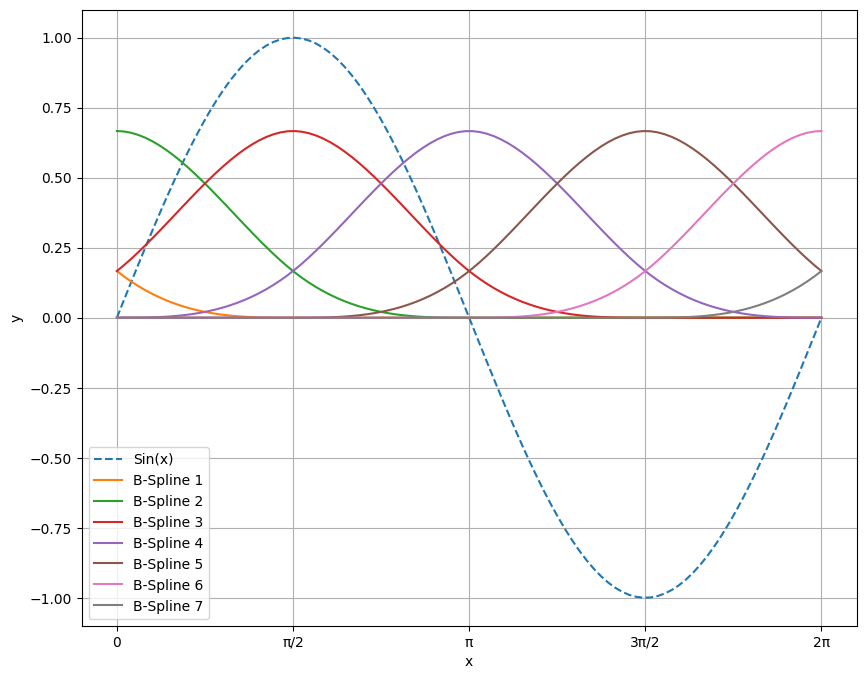

In [19]:
# SplineTransformer with default knots & degree
spline_transformer = SplineTransformer()

# Estimate the Sin(x)
y_hat = spline_transformer.fit_transform(x.reshape(-1, 1))

# counting the Splines
i = 0
nums = np.shape(y_hat)
nums = np.array(nums)
nums = nums[1]

# display the Sin(x) & the estimations
plt.figure(figsize=(10, 8))
plt.plot(x, y, label="Sin(x)", linestyle='--')
for i in range(nums):
    plt.plot(x, y_hat[:, i], label=f"B-Spline {i+1}")
    plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.xticks(np.arange(0, 2*np.pi + np.pi/2, np.pi/2),
           ['0', 'π/2', 'π', '3π/2', '2π'])
plt.grid()
plt.show()

The relationship between the number of knots, the degree of B-splines, and their count is interrelated and depends on the desired complexity and flexibility of the B-spline basis.
increasing the number of knots and the degree of B-splines increases their flexibility, but it's essential to find a balance to avoid overfitting. The count of B-splines is a function of both the number of knots and the degree. Experimenting with different combinations and validating the results on a test dataset can help in determining the optimal configuration for a particular modeling task.

1. **Number of Knots (n_knots):** The number of knots determines the flexibility of the B-spline. Increasing the number of knots allows the spline to have more flexibility and adapt to the data in a finer-grained manner. However, adding too many knots may lead to overfitting.

2. **Degree of B-splines (degree):** The degree of the B-spline basis functions influences the smoothness of the curve. Higher degrees allow the curve to have more local control points, leading to more flexibility and potentially capturing more complex patterns in the data. However, higher degrees may also introduce oscillations or artifacts if not carefully chosen.

3. **Count of B-splines:** The count of B-splines is determined by the combination of the number of knots and the degree. Specifically, the count is given
by **(n_knots + degree - 1)**. This formula accounts for the fact that each internal knot introduces a new B-spline basis function, and the degree determines the order of the basis functions.


## 2.

Coefficients: [ 0.85032067 -0.53867386  0.93465277 -0.75246439 -1.81619178 -0.91396688
  2.23632347]
Intercept: 0.5002756805279144 

MSE on training data: 0.05270346471745154
MSE on testing data: 0.042797670552006103


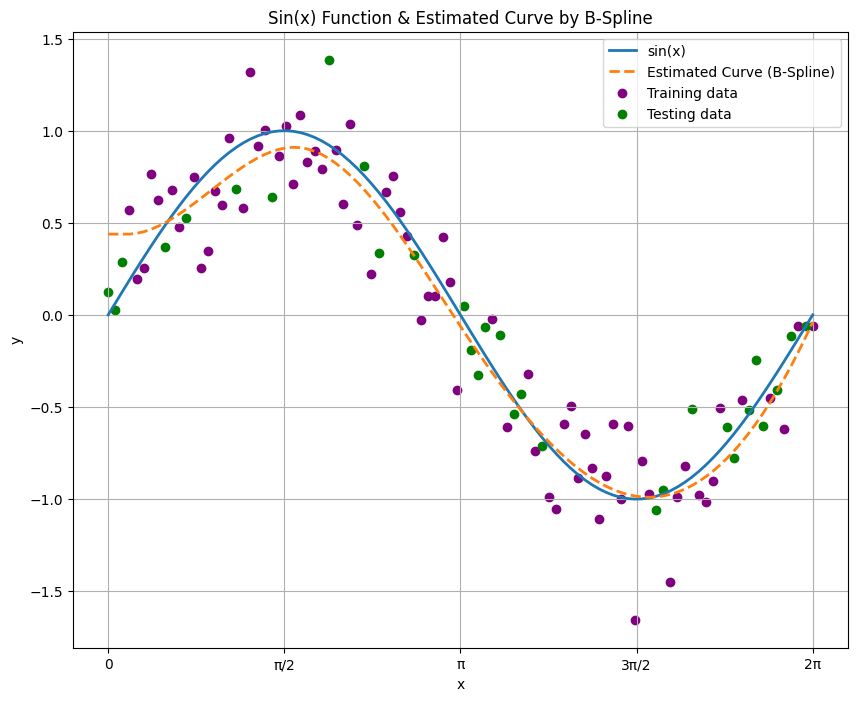

In [20]:
# Use SplineTransformer with default knots & degree
spline_transformer = SplineTransformer()

X_train_spline = spline_transformer.fit_transform(x_train[:,
                                                          np.newaxis])
X_test_spline = spline_transformer.transform(x_test[:, np.newaxis])

# Use model Linear regression
model = LinearRegression()
model.fit(X_train_spline, y_train)

# Predictions on the training data
y_train_pred = model.predict(X_train_spline)

# Calculate MSE on training data
mse_train = mean_squared_error(y_train, y_train_pred)

# Predictions on the testing data
y_test_pred = model.predict(X_test_spline)

# Calculate MSE on testing data
mse_test = mean_squared_error(y_test, y_test_pred)

# Print coefficients and MSE
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_, '\n')
print("MSE on training data:", mse_train)
print("MSE on testing data:", mse_test)

# Display the estimated curve & Sin(x)
plt.figure(figsize=(10, 8))
plt.plot(x, np.sin(x), label="sin(x)", linewidth=2)
plt.plot(x, model.predict(spline_transformer.transform(x[:, np.newaxis])),
         label="Estimated Curve (B-Spline)", linestyle="--", linewidth=2)
plt.scatter(x_train, y_train, label="Training data", color="purple")
plt.scatter(x_test, y_test, label="Testing data", color="green")
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sin(x) Function & Estimated Curve by B-Spline')
plt.grid()
plt.xticks(np.arange(0, 2*np.pi + np.pi/2, np.pi/2),
           ['0', 'π/2', 'π', '3π/2', '2π'])
plt.show()

## 3.

In [21]:
# Generate polynomial features with degree 3
poly_features = PolynomialFeatures(degree=3)

# fit & transform by PolynomialFeatures
X_train_poly = poly_features.fit_transform(x_train[:, np.newaxis])
X_test_poly = poly_features.transform(x_test[:, np.newaxis])

x_points = np.linspace(0, 2*np.pi, 300)
x_points_poly = poly_features.fit_transform(x_points[:, np.newaxis])

# Linear regression on the polynomial features for training data
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

# Predictions on the training data
y_train_pred_poly = model_poly.predict(X_train_poly)

# Calculate MSE on training data
mse_train_poly = mean_squared_error(y_train, y_train_pred_poly)

# Predictions on the testing data
y_test_pred_poly = model_poly.predict(X_test_poly)

# Calculate MSE on testing data
mse_test_poly = mean_squared_error(y_test, y_test_pred_poly)

# Print coefficients and MSE for polynomial features
print("Coefficients (Polynomial Features):", model_poly.coef_)
print("Intercept (Polynomial Features):", model_poly.intercept_, '\n')
print("MSE on training data (Polynomial Features):", mse_train_poly)
print("MSE on testing data (Polynomial Features):", mse_test_poly)


Coefficients (Polynomial Features): [ 0.          1.6471602  -0.77874807  0.08268601]
Intercept (Polynomial Features): -0.09814378427969324 

MSE on training data (Polynomial Features): 0.058333540163929165
MSE on testing data (Polynomial Features): 0.04470717903997131


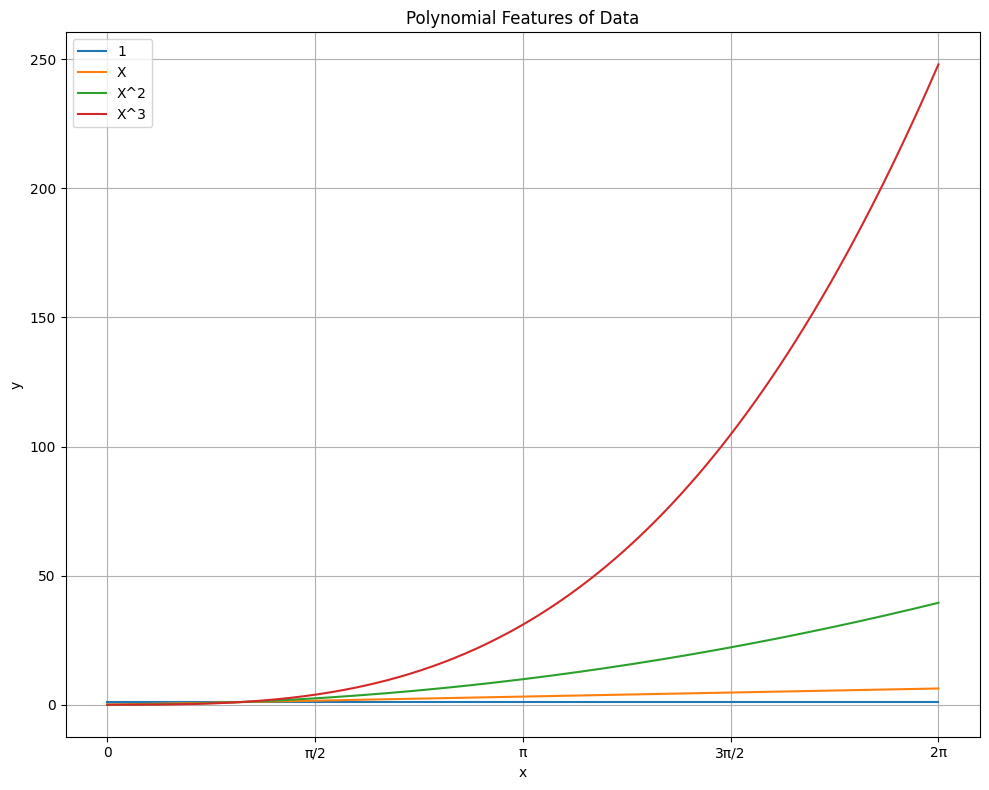

In [22]:
# Display the results for polynomial features
plt.figure(figsize=(10, 8))

labels = ['1', 'X', 'X^2', 'X^3']
for i, label in enumerate(labels):
    plt.plot(x_points, x_points_poly[:, i], label=label)

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Features of Data')
plt.grid()
plt.xticks(np.arange(0, 2*np.pi + np.pi/2, np.pi/2),
           ['0', 'π/2', 'π', '3π/2', '2π'])
plt.tight_layout()
plt.show()

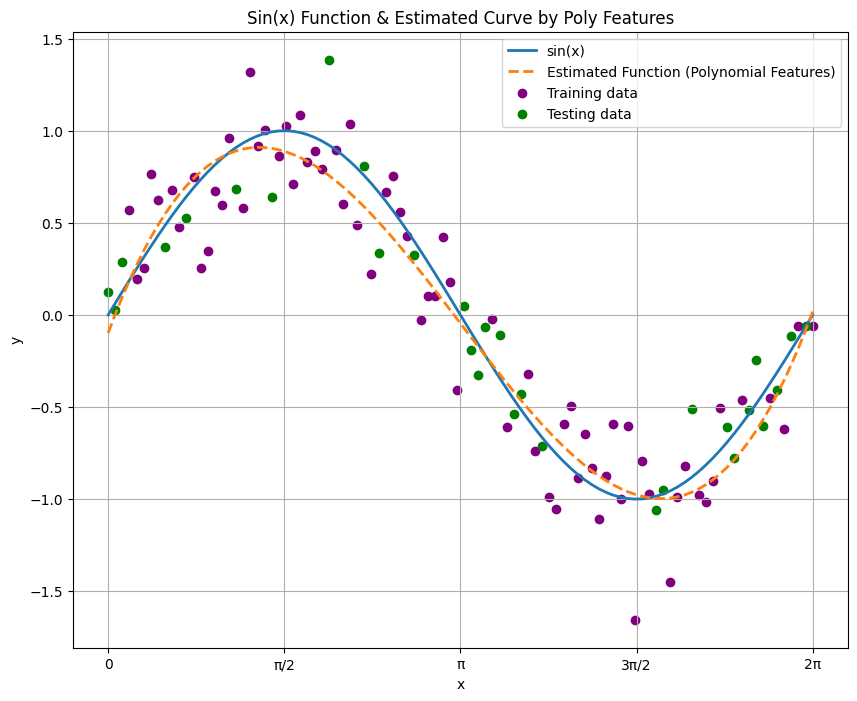

In [23]:
# Plot the Estimated curve by Poly features & Sin(x)
plt.figure(figsize=(10, 8))

plt.plot(x, np.sin(x), label="sin(x)", linewidth=2)
plt.plot(x, model_poly.predict(poly_features.transform(x[:, np.newaxis])),
         label="Estimated Function (Polynomial Features)", linestyle="--", linewidth=2)

plt.scatter(x_train, y_train, label="Training data", color="purple")
plt.scatter(x_test, y_test, label="Testing data", color="green")

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sin(x) Function & Estimated Curve by Poly Features')
plt.grid()
plt.xticks(np.arange(0, 2*np.pi + np.pi/2, np.pi/2),
           ['0', 'π/2', 'π', '3π/2', '2π'])
plt.show()

## 4.

In [24]:
# Gaussian functions
def gaussian(x, mean, variance=1):
    return np.exp(-((x - mean) ** 2) / (2 * variance))


# different gaussian Mean
gaussian_means = [0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi]

# use features by Gaussian functions
X_train_gaussian = np.column_stack([gaussian(x_train, mean)
                                    for mean in gaussian_means])
X_test_gaussian = np.column_stack([gaussian(x_test, mean)
                                   for mean in gaussian_means])
x
# Linear regression on the Gaussian features for training data
model_gaussian = LinearRegression()
model_gaussian.fit(X_train_gaussian, y_train)

# Predictions on the training data
y_train_pred_gaussian = model_gaussian.predict(X_train_gaussian)

# Calculate MSE on training data
mse_train_gaussian = mean_squared_error(y_train, y_train_pred_gaussian)

# Predictions on the testing data
y_test_pred_gaussian = model_gaussian.predict(X_test_gaussian)

# Calculate MSE on testing data
mse_test_gaussian = mean_squared_error(y_test, y_test_pred_gaussian)

# Print coefficients and MSE for Gaussian features
print("Coefficients (Gaussian Features):", model_gaussian.coef_)
print("Intercept (Gaussian Features):", model_gaussian.intercept_, '\n')
print("MSE on training data (Gaussian Features):", mse_train_gaussian)
print("MSE on testing data (Gaussian Features):", mse_test_gaussian)


Coefficients (Gaussian Features): [-2.33902819 -0.90893412 -2.05897477 -2.83493621 -2.31716591]
Intercept (Gaussian Features): 3.1233800965205933 

MSE on training data (Gaussian Features): 0.0525966309327631
MSE on testing data (Gaussian Features): 0.045600602561599


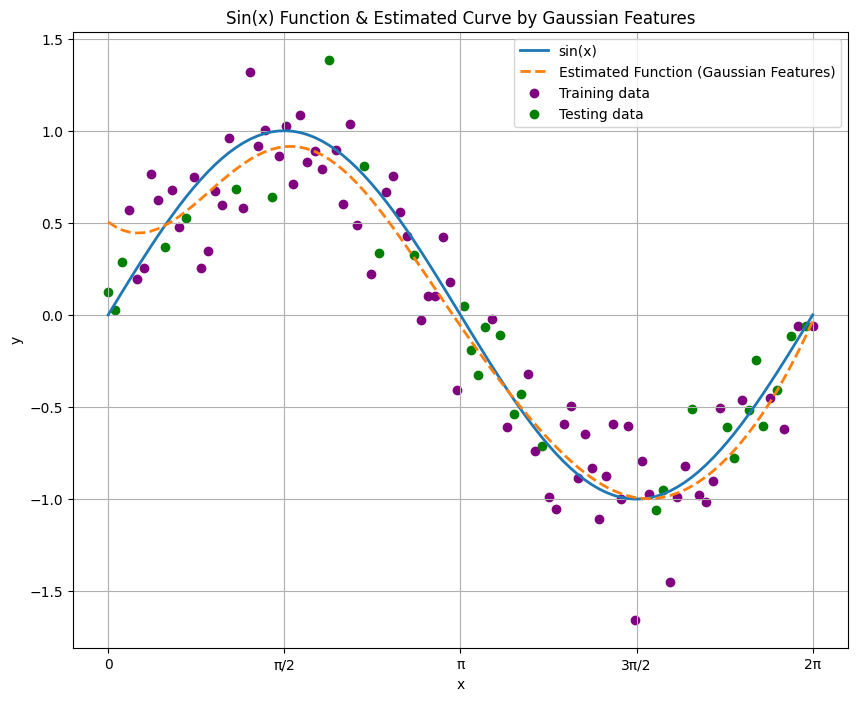

In [25]:
# Plot the Estimated curve by Gaussian Features & Sin(x)
plt.figure(figsize=(10, 8))

plt.plot(x, np.sin(x), label="sin(x)", linewidth=2)
plt.plot(x, model_gaussian.predict(np.column_stack([gaussian(x, mean) for mean in gaussian_means])),
         label="Estimated Function (Gaussian Features)", linestyle="--", linewidth=2)

plt.scatter(x_train, y_train, label="Training data", color="purple")
plt.scatter(x_test, y_test, label="Testing data", color="green")

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sin(x) Function & Estimated Curve by Gaussian Features')
plt.grid()
plt.xticks(np.arange(0, 2*np.pi + np.pi/2, np.pi/2),
           ['0', 'π/2', 'π', '3π/2', '2π'])
plt.show()

The MSE:

- Spline:

  - MSE on training data: 0.05270346471745154

  - MSE on testing data: 0.042797670552006103

- Polynomial:

  - MSE on training data: 0.058333540163929165

  - MSE on testing data: 0.04470717903997131

- Gaussian Filter:

  - MSE on training data: 0.0525966309327631

  - MSE on testing data : 0.045600602561599

From the above values that we calculated for MSE for Training & Testing data, we can see that the minimum and the best MSE in testing data is belonged to **Spline** and the worst one is belonged to **Gaussian** and it would be a bad choice to use.

So, if the Spline is the best method here, then Polynomial and then Gaussian (worst one).




---

# **Section 2)**


In [26]:
# variables
x, y = variables('x y')

# parameters
a13, a12, a11, a10 = parameters('a13, a12, a11, a10')
a23, a22, a21, a20 = parameters('a23, a22, a21, a20')
a33, a32, a31, a30 = parameters('a33, a32, a31, a30')
a43, a42, a41, a40 = parameters('a43, a42, a41, a40')

# poly functions
poly_segment_1 = a13 * x**3 + a12 * x**2 + a11 * x + a10
poly_segment_2 = a23 * x**3 + a22 * x**2 + a21 * x + a20
poly_segment_3 = a33 * x**3 + a32 * x**2 + a31 * x + a30
poly_segment_4 = a43 * x**3 + a42 * x**2 + a41 * x + a40

# different ranges
ranges = [(3*np.pi/2), (np.pi), (np.pi/2)]

# Piecewise poly function
piecewise_poly = Piecewise((poly_segment_1, x < ranges[2]),
                           (poly_segment_2, (x >= ranges[2]) & (x < ranges[1])),
                           (poly_segment_3, (x >= ranges[1]) & (x < ranges[0])),
                           (poly_segment_4, x >= ranges[0]))

piecewise_poly

Piecewise((a10 + a11*x + a12*x**2 + a13*x**3, x < 1.5707963267949), (a20 + a21*x + a22*x**2 + a23*x**3, x < 3.14159265358979), (a30 + a31*x + a32*x**2 + a33*x**3, x < 4.71238898038469), (a40 + a41*x + a42*x**2 + a43*x**3, True))

In [27]:
constraints = [
    # Conditions for continuity and linearity
    Eq(poly_segment_1.subs(x, ranges[2]), poly_segment_2.subs(x, ranges[2])),
    Eq(poly_segment_2.subs(x, ranges[1]), poly_segment_3.subs(x, ranges[1])),
    Eq(poly_segment_3.subs(x, ranges[0]), poly_segment_4.subs(x, ranges[0])),

    # first derivatives condition
    Eq(diff(poly_segment_1, x).subs({x: ranges[2]}), diff(poly_segment_2, x).subs({x: ranges[2]})),
    Eq(diff(poly_segment_2, x).subs({x: ranges[1]}), diff(poly_segment_3, x).subs({x: ranges[1]})),
    Eq(diff(poly_segment_3, x).subs({x: ranges[0]}), diff(poly_segment_4, x).subs({x: ranges[0]})),

    # second derivatives condition
    Eq(diff(poly_segment_1, x, 2).subs({x: ranges[2]}), diff(poly_segment_2, x, 2).subs({x: ranges[2]})),
    Eq(diff(poly_segment_2, x, 2).subs({x: ranges[1]}), diff(poly_segment_3, x, 2).subs({x: ranges[1]})),
    Eq(diff(poly_segment_3, x, 2).subs({x: ranges[0]}), diff(poly_segment_4, x, 2).subs({x: ranges[0]})),

    # Natural cubic spline
    Eq(a12, 0),
    Eq(a13, 0),
    Eq(a42, 0),
    Eq(a43, 0)
]

# Use spline model
model = Model({y: piecewise_poly})

# Fit the model
model_1 = Fit(model, x=x_train, y=y_train, constraints=constraints[0:2])
model_2 = Fit(model, x=x_train, y=y_train, constraints=constraints[0:5])
model_3 = Fit(model, x=x_train, y=y_train, constraints=constraints[0:8])
model_4 = Fit(model, x=x_train, y=y_train, constraints=constraints[0:12])

fit1_result = model_1.execute()
fit2_result = model_2.execute()
fit3_result = model_3.execute()
fit4_result = model_4.execute()

In [28]:
# MSE for training data
mse_train1 = mean_squared_error(model(x=x_train, **fit1_result.params).y, y_train)
mse_train2 = mean_squared_error(model(x=x_train, **fit2_result.params).y, y_train)
mse_train3 = mean_squared_error(model(x=x_train, **fit3_result.params).y, y_train)
mse_train4 = mean_squared_error(model(x=x_train, **fit4_result.params).y, y_train)

# MSE for testing data
mse_test1 = mean_squared_error( model(x=x_test, **fit1_result.params).y, y_test)
mse_test2 = mean_squared_error( model(x=x_test, **fit2_result.params).y, y_test)
mse_test3 = mean_squared_error( model(x=x_test, **fit3_result.params).y, y_test)
mse_test4 = mean_squared_error( model(x=x_test, **fit4_result.params).y, y_test)

# Print the MSE for Splines
print('Train - In Model 1:', mse_train1)
print('Test  - In Model 1:', mse_test1)
print('-'*40)
print('Train - In Model 2:', mse_train2)
print('Test  - In Model 2:', mse_test2)
print('-'*40)
print('Train - In Model 3:', mse_train3)
print('Test  - In Model 3:', mse_test3)
print('-'*40)
print('Train - In Model 4:', mse_train4)
print('Test  - In Model 4:', mse_test4)


Train - In Model 1: 0.05047324423427649
Test  - In Model 1: 0.05686368735449929
----------------------------------------
Train - In Model 2: 0.051281491793424776
Test  - In Model 2: 0.060780710976590095
----------------------------------------
Train - In Model 3: 0.05188037651211129
Test  - In Model 3: 0.047928319985402694
----------------------------------------
Train - In Model 4: 0.08235440218623884
Test  - In Model 4: 0.10105457103818645


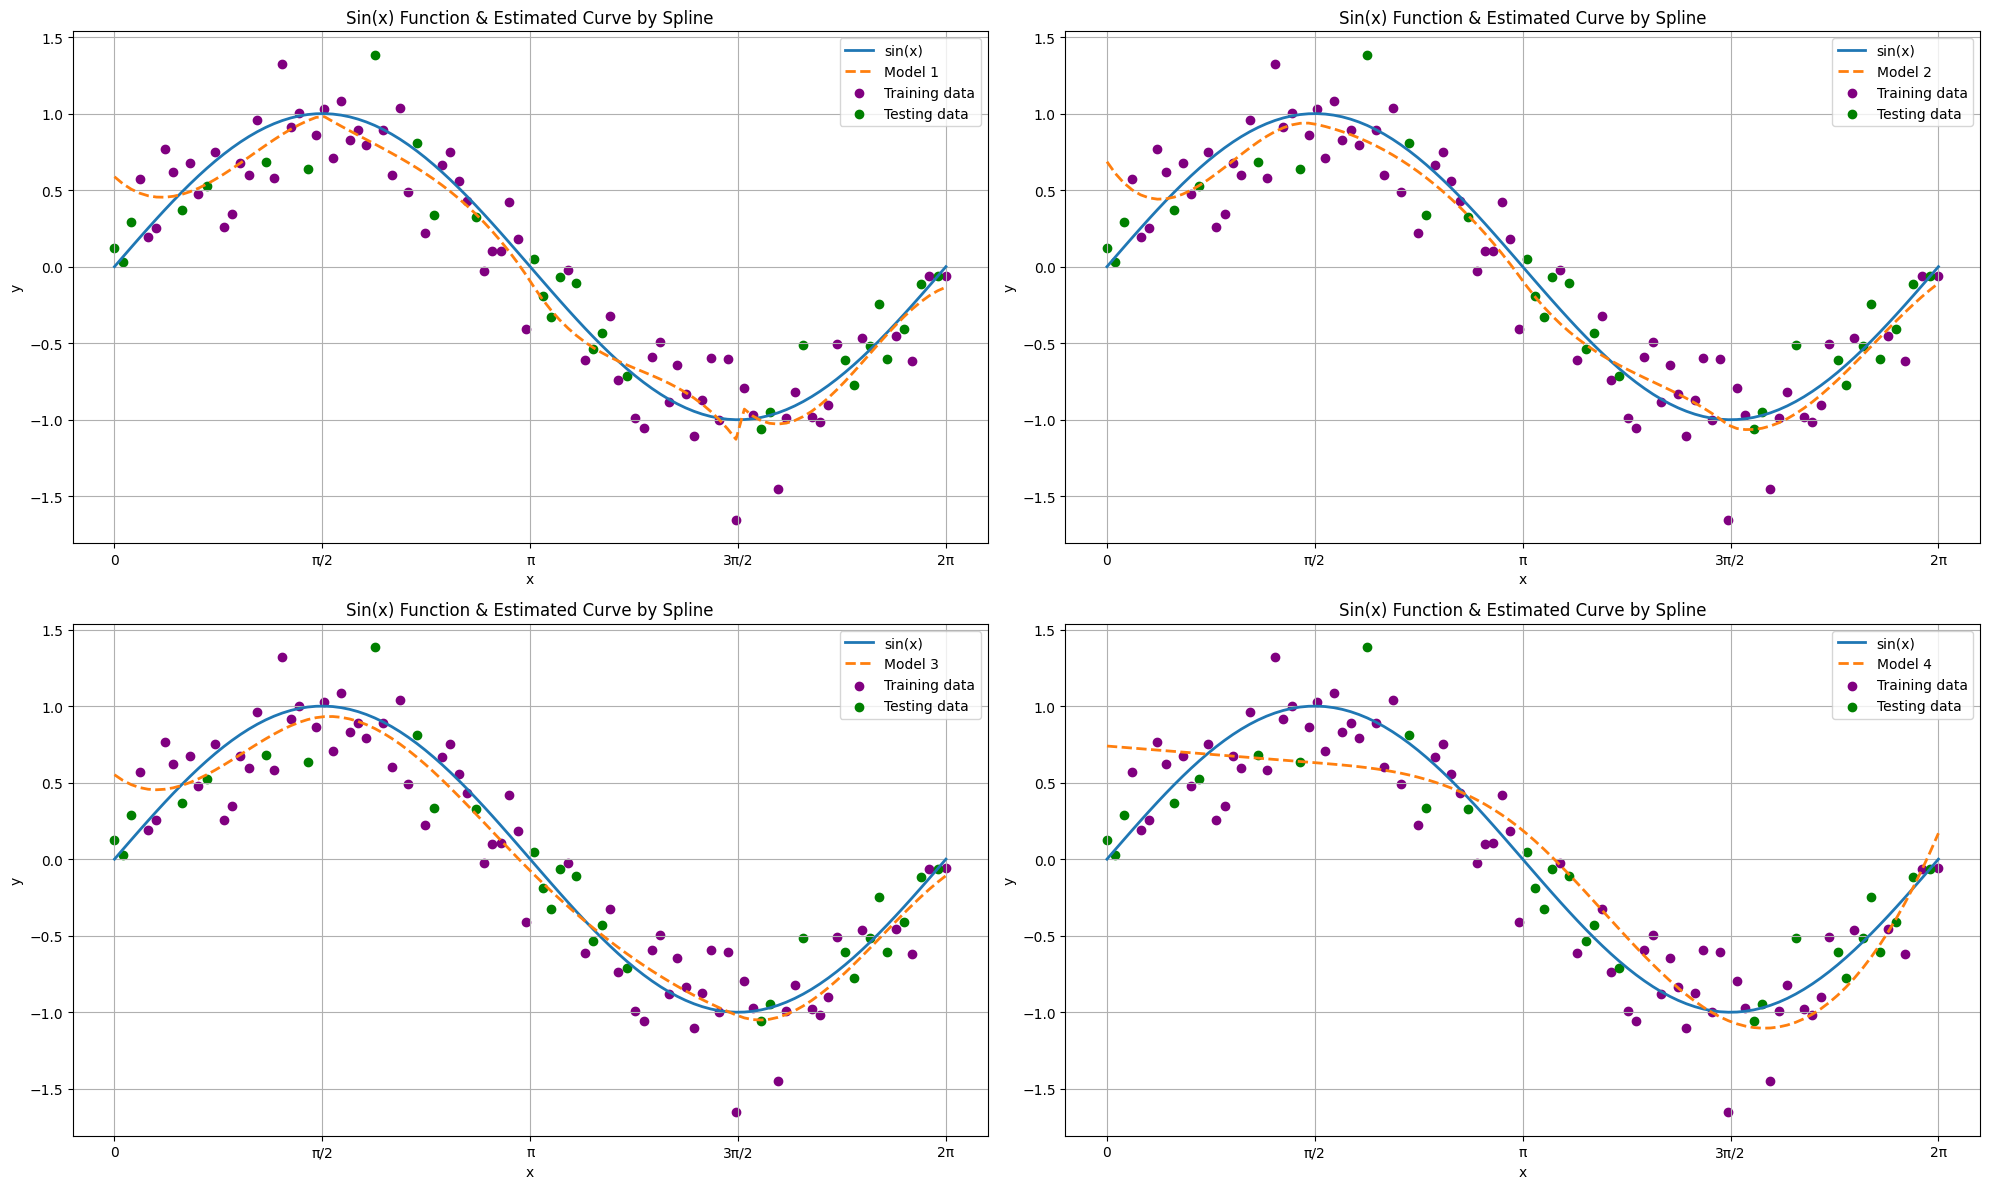

In [29]:
fits = [fit1_result, fit2_result, fit3_result, fit4_result]
x = np.linspace(0, 2*np.pi, num_points)

# Plot the Estimated curve by Splines & Sin(x)
plt.figure(figsize=(20, 12))

for i in range(1,5):
  plt.subplot(2,2,i)
  plt.plot(x, np.sin(x), label="sin(x)", linewidth=2)
  plt.plot(x, model(x=x, **fits[i-1].params).y, label=f'Model {i}', linestyle="--", linewidth=2)

  plt.scatter(x_train, y_train, label="Training data", color="purple")
  plt.scatter(x_test, y_test, label="Testing data", color="green")

  plt.legend()
  plt.xlabel('x')
  plt.ylabel('y')
  plt.title('Sin(x) Function & Estimated Curve by Spline')
  plt.grid()
  plt.xticks(np.arange(0, 2*np.pi + np.pi/2, np.pi/2),
            ['0', 'π/2', 'π', '3π/2', '2π'])
  plt.tight_layout()

plt.show()

---

# **Section 3)**

In [30]:
np.random.seed(42)

# generate the range of x values in range 0 to 2*pi
num_points = 100
x = np.linspace(0, 2*np.pi, num_points)

# generate the sin(x) function and y values
y = np.sin(x)
normal_noise = 0.25 * np.random.normal(size=len(x))
y_noise = y + normal_noise

# Randomly shuffle the indices
indices = np.arange(num_points)
# np.random.shuffle(indices)

train_indices = np.random.choice(indices, 70, replace=False)
test_indices = np.delete(indices, train_indices)
train_indices = np.sort(train_indices, axis=0)
test_indices = np.sort(test_indices, axis=0)

# training & testing points
x_train_sorted = x[train_indices]
y_train_sorted = y_noise[train_indices]

x_test_sorted = x[test_indices]
y_test_sorted = y_noise[test_indices]

P = 0.0:
MSE on training: 0.20102045835286278
MSE for testing: 0.27030159897949085
----------------------------------------
P = 0.1:
MSE on training: 0.11896474604289344
MSE for testing: 0.1507007174869391
----------------------------------------
P = 0.2:
MSE on training: 0.08635722001814423
MSE for testing: 0.10011846439867854
----------------------------------------
P = 0.3:
MSE on training: 0.07102525980696571
MSE for testing: 0.07455081703063696
----------------------------------------
P = 0.4:
MSE on training: 0.0630301100570236
MSE for testing: 0.06012980310811479
----------------------------------------
P = 0.5:
MSE on training: 0.05855177156324832
MSE for testing: 0.051386770244594406
----------------------------------------
P = 0.6:
MSE on training: 0.055889122176126904
MSE for testing: 0.04584449656944788
----------------------------------------
P = 0.7:
MSE on training: 0.05418727234095891
MSE for testing: 0.04228977165370551
----------------------------------------
P = 0.8:

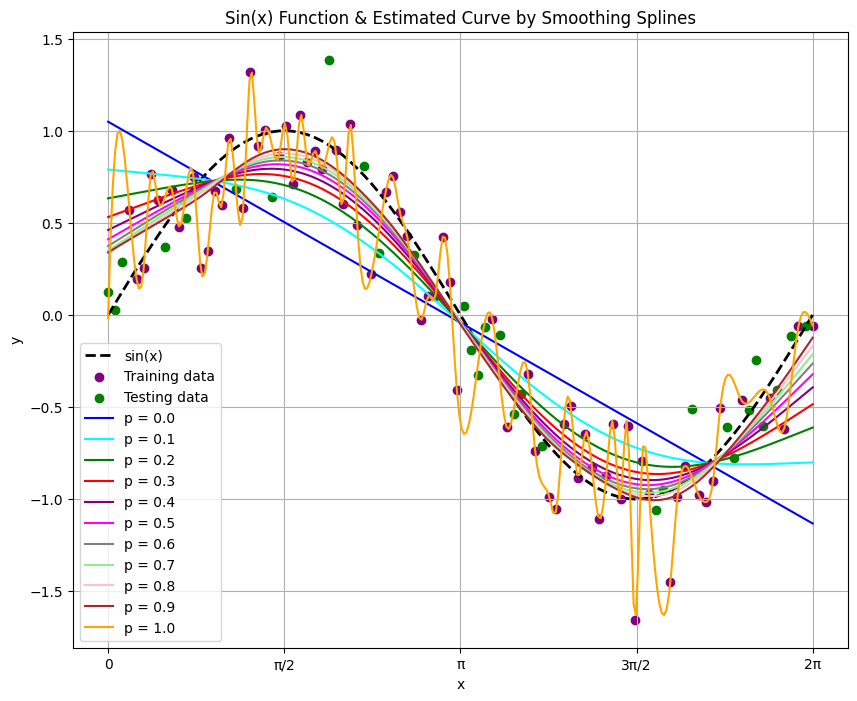

In [31]:
# different range of smoothing parameter values
smooth_values = np.linspace(0, 1, 11).round(1)

# different color to plot
colors = ['blue', 'cyan', 'green', 'red', 'purple', 'magenta', 'gray', 'lightgreen', 'pink', 'brown', 'orange']
i = 0

# Calculate MSE & display the sin(x) function and the estimated curves by Smoothing Splines
plt.figure(figsize=(10, 8))

plt.plot(x, np.sin(x), label="sin(x)", linewidth=2, linestyle='--', color="black")
plt.scatter(x_train_sorted, y_train_sorted, label="Training data", color="purple")
plt.scatter(x_test_sorted, y_test_sorted, label="Testing data", color="green")

for p in smooth_values:
    # display the plots
    y_points = csaps(x_train_sorted, y_train_sorted, x_points, smooth=p)
    y_train_pred = csaps(x_train_sorted, y_train_sorted, x_train_sorted, smooth=p)
    y_test_pred = csaps(x_train_sorted, y_train_sorted, x_test_sorted, smooth=p)
    plt.plot(x_points, y_points, label=f'p = {p}', color=colors[i])
    i += 1

    # MSE
    mse_train = mean_squared_error(y_train_pred, y_train_sorted)
    mse_test = mean_squared_error(y_test_pred, y_test_sorted)

    # Print the results
    print(f'P = {p}:')
    print('MSE on training:', mse_train)
    print('MSE for testing:', mse_test)
    print('-'*40)

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sin(x) Function & Estimated Curve by Smoothing Splines')
plt.grid()
plt.xticks(np.arange(0, 2*np.pi + np.pi/2, np.pi/2),
           ['0', 'π/2', 'π', '3π/2', '2π'])
plt.show()

---

# **Section 4)**

## preprocess on dataset

In [ ]:
# import txt file of dataset
df = pd.read_csv('./Bone Mineral Density.txt', sep='\t')

# save the dataset in CSV file
df.to_csv('Bone Mineral Density.csv', index=False)

In [5]:
# import the dataset file in CSV format
df = pd.read_csv ('/content/drive/MyDrive/Bone Mineral Density.csv')
df

,idnum,age,gender,spnbmd
0,1,11.70,male,0.018081
1,1,12.70,male,0.060109
2,1,13.75,male,0.005858
3,2,13.25,male,0.010264
4,2,14.30,male,0.210526
...,...,...,...,...
480,380,11.60,male,0.116368
481,381,9.80,female,0.097902
482,382,11.90,male,0.028986
483,383,11.20,male,-0.064103


In [6]:
each_column = df.isnull().sum(axis=0)
all_Null = each_column.sum()

print('How many Null values are in each coulmns:', '\n', each_column)
print('\nSum of All Nulls:', all_Null)

How many Null values are in each coulmns: 
 idnum     0
age       0
gender    0
spnbmd    0
dtype: int64

Sum of All Nulls: 0


In [7]:
df.shape

(485, 4)

In [8]:
# seperate the data of men & female in "gender" column
male_data = df[df['gender'] == 'male']
female_data = df[df['gender'] == 'female']

# Train & Test for male data
male_train, male_test = train_test_split(male_data,
                                         test_size=0.3, random_state=42)

# Train & Test for female data
female_train, female_test = train_test_split(female_data,
                                             test_size=0.3, random_state=42)

In [9]:
male_train

,idnum,age,gender,spnbmd
110,56,11.65,male,0.018686
230,116,17.65,male,0.076036
274,151,19.35,male,0.006498
264,143,18.10,male,-0.010319
119,59,12.70,male,-0.012195
...,...,...,...,...
209,106,17.65,male,0.007490
41,24,15.30,male,0.059319
175,89,21.85,male,0.016472
397,275,14.70,male,0.058793


In [10]:
# define the Feature & y_target For males
# 'age' is the feature
X_male = male_train[['age']]
y_male = male_train['spnbmd']
###############################################
# define the Feature & y_target For females
# 'age' is the feature
X_female = female_train[['age']]
# 'spnbmd' is for y_target
y_female = female_train['spnbmd']

In [11]:
X_male

,age
110,11.65
230,17.65
274,19.35
264,18.10
119,12.70
...,...
209,17.65
41,15.30
175,21.85
397,14.70


## 1.

In [32]:
# Use StandardScaler
scaler_male = StandardScaler()
X_male_scaled = scaler_male.fit_transform(X_male)

scaler_female = StandardScaler()
X_female_scaled = scaler_female.fit_transform(X_female)

################################################################################
# Use Ridge Reg model with polynomial features for males
ridge_model_male = make_pipeline(PolynomialFeatures(), Ridge())
ridge_model_male_params = {
    'polynomialfeatures__degree': np.arange(1, 10),
    'ridge__alpha': 10**np.linspace(3, -3, 100) * 0.5
}

# Use Ridge Reg model with polynomial features for males
ridge_model_female = make_pipeline(PolynomialFeatures(), Ridge())
ridge_model_female_params = {
    'polynomialfeatures__degree': np.arange(1, 10),
    'ridge__alpha': 10**np.linspace(3, -3, 100) * 0.5
}

################################################################################
# Use GridSearchCV to find the best degree and Ridge parameter for males
grid_search_male = GridSearchCV(ridge_model_male,
                                ridge_model_male_params, cv=5,
                                scoring='neg_mean_squared_error')
grid_search_male.fit(X_male_scaled, y_male)

# Use GridSearchCV to find the best degree and Ridge parameter for females
grid_search_female = GridSearchCV(ridge_model_female,
                                  ridge_model_female_params, cv=5,
                                  scoring='neg_mean_squared_error')
grid_search_female.fit(X_female_scaled, y_female)

################################################################################
# Get the best polynomial degree and Ridge parameters for males & females
best_degree_male = grid_search_male.best_params_['polynomialfeatures__degree']
best_alpha_male = grid_search_male.best_params_['ridge__alpha']

best_degree_female = grid_search_female.best_params_['polynomialfeatures__degree']
best_alpha_female = grid_search_female.best_params_['ridge__alpha']

################################################################################
# Print the results
print("Males:")
print("Best Polynomial Degree:", best_degree_male)
print("Best Ridge Parameter:", best_alpha_male)
print("-" * 40)
print("Females:")
print("Best Polynomial Degree:", best_degree_female)
print("Best Ridge Parameter:", best_alpha_female)


Males:
Best Polynomial Degree: 8
Best Ridge Parameter: 0.07599555414764665
----------------------------------------
Females:
Best Polynomial Degree: 9
Best Ridge Parameter: 0.35274011553593226


In [33]:
# test data for male (considering the scaler)
X_male_test = scaler_male.transform(male_test[['age']])
y_male_test = male_test['spnbmd']

#  test data for female (considering the scaler)
X_female_test = scaler_female.transform(female_test[['age']])
y_female_test = female_test['spnbmd']


# Ridge regression model with best alpha that is calculated before
model_male = Ridge(alpha=best_alpha_male)
model_female = Ridge(alpha=best_alpha_female)

# Fit the models
model_male.fit(X_male_scaled, y_male)
model_female.fit(X_female_scaled, y_female)

# Predicts
y_male_pred_train = model_male.predict(X_male_scaled)
y_male_pred_test = model_male.predict(X_male_test)

y_female_pred_train = model_female.predict(X_female_scaled)
y_female_pred_test = model_female.predict(X_female_test)

# Calculate MSE and R^2 for males
mse_male_train = mean_squared_error(y_male, y_male_pred_train)
mse_male_test = mean_squared_error(y_male_test, y_male_pred_test)

r2_male_train = r2_score(y_male, y_male_pred_train)
r2_male_test = r2_score(y_male_test, y_male_pred_test)

# Calculate MSE and R^2 for females
mse_female_train = mean_squared_error(y_female, y_female_pred_train)
mse_female_test = mean_squared_error(y_female_test, y_female_pred_test)

r2_female_train = r2_score(y_female, y_female_pred_train)
r2_female_test = r2_score(y_female_test, y_female_pred_test)

# Print the results
print("Males:")
print("MSE - Train:", mse_male_train)
print("MSE - Test:", mse_male_test)
print("R^2 - Train:", r2_male_train)
print("R^2 - Test:", r2_male_test)
print("-" * 40)
print("Females:")
print("MSE - Train:", mse_female_train)
print("MSE - Test:", mse_female_test)
print("R^2 - Train:", r2_female_train)
print("R^2 - Test:", r2_female_test)


Males:
MSE - Train: 0.001971028676939259
MSE - Test: 0.0021117599035897455
R^2 - Train: 0.11957268362501894
R^2 - Test: 0.20200667264676897
----------------------------------------
Females:
MSE - Train: 0.0016035603768308469
MSE - Test: 0.0016441958098310512
R^2 - Train: 0.35856659162176674
R^2 - Test: 0.37611803123066656


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.78503e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.98669e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


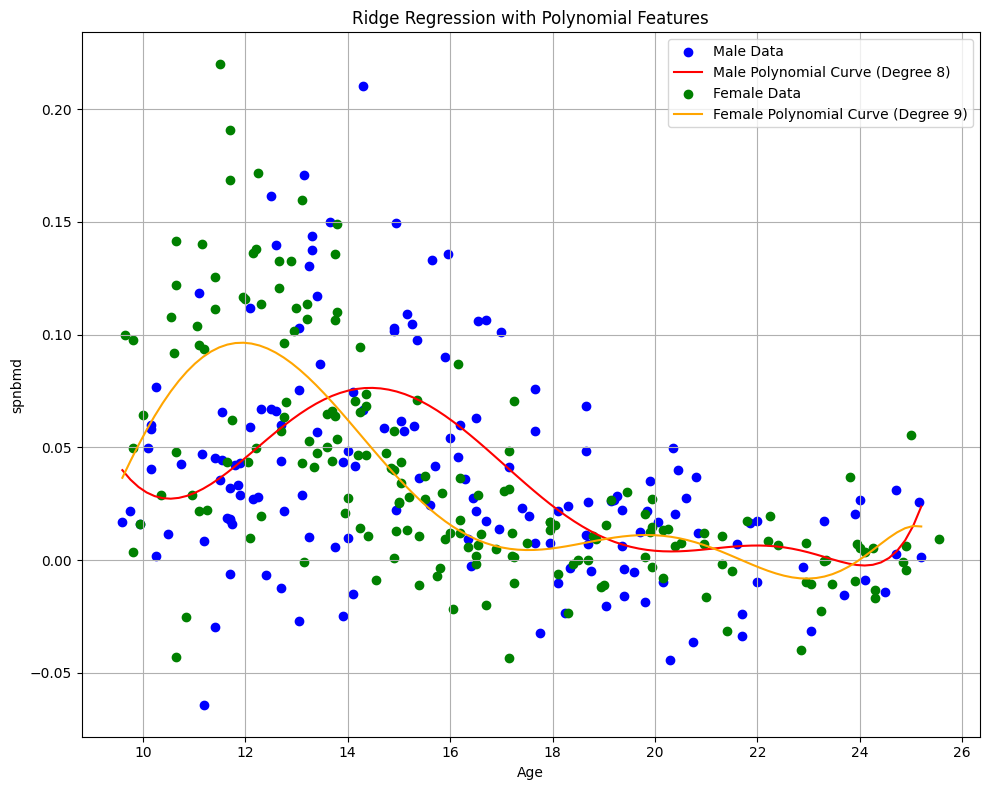

In [34]:
# Generate a range of age values for plotting
age_values = np.linspace(X_male['age'].min(),
                         X_male['age'].max(), 100).reshape(-1, 1)

# best polynomial degree that is calculated before
degree_male = best_degree_male
degree_female = best_degree_female

# Ridge regression models with polynomial features
model_male = make_pipeline(PolynomialFeatures(degree_male),
                           Ridge(alpha=best_alpha_male))
model_female = make_pipeline(PolynomialFeatures(degree_female),
                             Ridge(alpha=best_alpha_female))

# Fit the models
model_male.fit(X_male, y_male)
model_female.fit(X_female, y_female)

# Predictions for males
y_male_pred = model_male.predict(age_values)

# Predictions for females
y_female_pred = model_female.predict(age_values)

# display the results
plt.figure(figsize=(10,8))

plt.scatter(X_male, y_male, label='Male Data', color='blue')
plt.plot(age_values, y_male_pred,
         label=f'Male Polynomial Curve (Degree {degree_male})', color='red')

plt.scatter(X_female, y_female, label='Female Data', color='green')
plt.plot(age_values, y_female_pred,
         label=f'Female Polynomial Curve (Degree {degree_female})', color='orange')

plt.xlabel('Age')
plt.ylabel('spnbmd')
plt.title('Ridge Regression with Polynomial Features')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


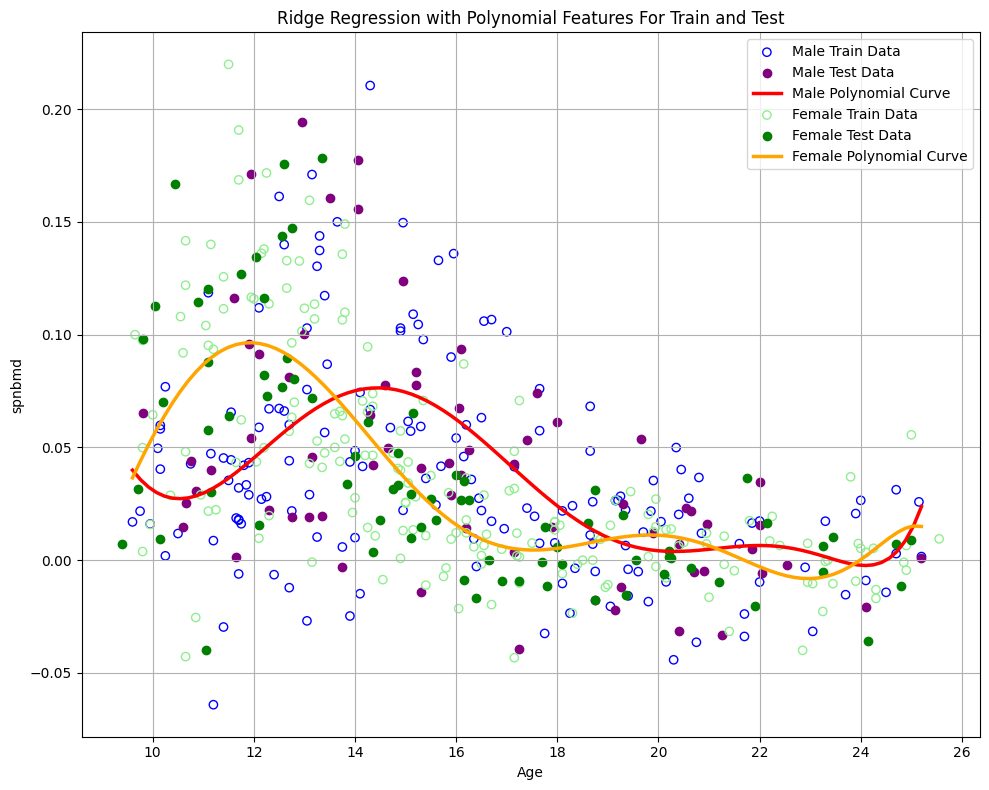

In [35]:
# test data for male
X_male_test = male_test[['age']]
y_male_test = male_test['spnbmd']

# test data for female
X_female_test = female_test[['age']]
y_female_test = female_test['spnbmd']

# Predictions Test data for males
y_male_pred_test = model_male.predict(scaler_male.transform
                                      (X_male_test))

# Predictions Test data for females
y_female_pred_test = model_female.predict(scaler_female.transform
                                          (X_female_test))

# display the results
plt.figure(figsize=(10,8))

plt.scatter(X_male, y_male, label='Male Train Data', color='blue',
            marker='o', facecolors='none')
plt.scatter(X_male_test, y_male_test,
            label='Male Test Data', color='purple')
plt.plot(age_values, y_male_pred,
         label='Male Polynomial Curve', color='red', linewidth=2.5)

plt.scatter(X_female, y_female, label='Female Train Data',
            marker='o', facecolors='none', color='lightgreen')
plt.scatter(X_female_test, y_female_test,
            label='Female Test Data', color='green')
plt.plot(age_values, y_female_pred,
         label='Female Polynomial Curve', color='orange', linewidth=2.5)

plt.xlabel('Age')
plt.ylabel('spnbmd')
plt.title('Ridge Regression with Polynomial Features For Train and Test')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

## 2.


In [36]:
# Define the Ridge regression model with SplineTransformer
model_male = make_pipeline(SplineTransformer(n_knots=6, degree=3),
                           Ridge())
model_female = make_pipeline(SplineTransformer(n_knots=6, degree=3),
                             Ridge())

param_grid = {
    'ridge__alpha': 10**np.linspace(3, -3, 100) * 0.5
}

# Use GridSearchCV for males
grid_search_male = GridSearchCV(model_male, param_grid, cv=5,
                                scoring='neg_mean_squared_error')
grid_search_male.fit(X_male_scaled, y_male)

# Use GridSearchCV for females
grid_search_female = GridSearchCV(model_female, param_grid, cv=5,
                                  scoring='neg_mean_squared_error')
grid_search_female.fit(X_female_scaled, y_female)

# Get the best models for males & females
best_model_male = grid_search_male.best_estimator_
best_model_female = grid_search_female.best_estimator_

# predictions on training data
y_male_pred_train = best_model_male.predict(X_male_scaled)
y_female_pred_train = best_model_female.predict(X_female_scaled)

# Make predictions on test data
X_male_test_scaled = scaler_male.transform(male_test[['age']])
X_female_test_scaled = scaler_female.transform(female_test[['age']])

y_male_pred_test = best_model_male.predict(X_male_test_scaled)
y_female_pred_test = best_model_female.predict(X_female_test_scaled)

# Calculate MSE and R^2 for males - Training
mse_male_train = mean_squared_error(y_male, y_male_pred_train)
r2_male_train = r2_score(y_male, y_male_pred_train)

# Calculate MSE and R^2 for females - Training
mse_female_train = mean_squared_error(y_female, y_female_pred_train)
r2_female_train = r2_score(y_female, y_female_pred_train)

# Calculate MSE and R^2 for males - Test
mse_male_test = mean_squared_error(male_test['spnbmd'], y_male_pred_test)
r2_male_test = r2_score(male_test['spnbmd'], y_male_pred_test)

# Calculate MSE and R^2 for females - Test
mse_female_test = mean_squared_error(female_test['spnbmd'], y_female_pred_test)
r2_female_test = r2_score(female_test['spnbmd'], y_female_pred_test)

# Print the results
print("Males:")
print("MSE - Train:", mse_male_train)
print("MSE - Test:", mse_male_test)
print("R^2 - Train:", r2_male_train)
print("R^2 - Test:", r2_male_test)
print("-" * 40)
print("Females:")
print("MSE - Train:", mse_female_train)
print("MSE - Test:", mse_female_test)
print("R^2 - Train:", r2_female_train)
print("R^2 - Test:", r2_female_test)

Males:
MSE - Train: 0.0015766209359894697
MSE - Test: 0.0018641077212195895
R^2 - Train: 0.29574837958758093
R^2 - Test: 0.29558965464198106
----------------------------------------
Females:
MSE - Train: 0.001223570845835767
MSE - Test: 0.0011807441157138823
R^2 - Train: 0.5105645977685171
R^2 - Test: 0.5519724845910681


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SplineTransformer was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SplineTransformer was fitted with feature names
  warnings.warn(


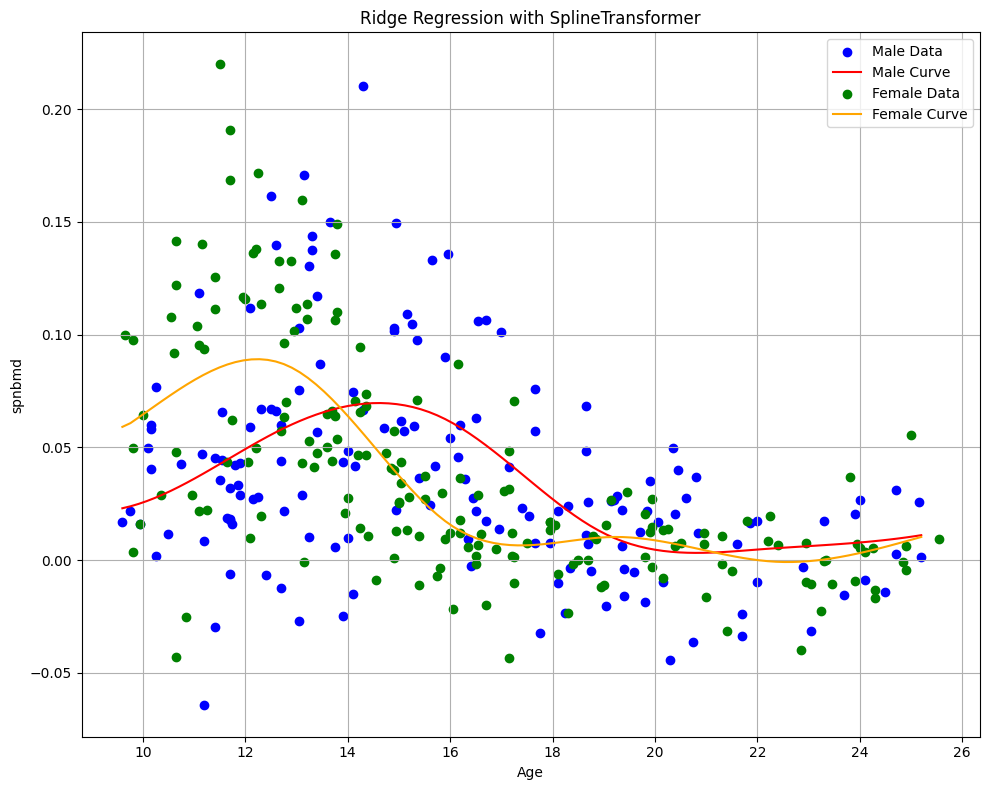

In [37]:
# Fit the models
model_male.fit(X_male, y_male)
model_female.fit(X_female, y_female)

# Predictions for males
y_male_pred = model_male.predict(age_values)

# Predictions for females
y_female_pred = model_female.predict(age_values)

# display the results
plt.figure(figsize=(10,8))

plt.scatter(X_male, y_male, label='Male Data', color='blue')
plt.plot(age_values, y_male_pred,
         label='Male Curve', color='red')

plt.scatter(X_female, y_female, label='Female Data', color='green')
plt.plot(age_values, y_female_pred,
         label='Female Curve', color='orange')

plt.xlabel('Age')
plt.ylabel('spnbmd')
plt.title('Ridge Regression with SplineTransformer')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

## 3.

### find the best p value for csaps for males & females

In [53]:
# Add small noise to age of male data
X_male_noise = X_male + 0.01 * np.random.normal(0, 1, len(X_male))[:, np.newaxis]
X_male_test_noise = X_male_test + 0.01 * np.random.normal(0, 1, len(X_male_test))[:, np.newaxis]

# Add small noise to age of female data
X_female_noise = X_female + 0.01 * np.random.normal(0, 1, len(X_female))[:, np.newaxis]
X_female_test_noise = X_female_test + 0.01*np.random.normal(0, 1, len(X_female_test))[:, np.newaxis]

################################################################################
# Sort age of male data
X_male_noise = X_male_noise.sort_values('age')
y_male_noise = y_male.loc[X_male_noise.index]

X_male_test_noise = X_male_test_noise.sort_values('age')
y_male_test_noise = y_male_test.loc[X_male_test_noise.index]

# Sort age of female data
X_female_noise = X_female_noise.sort_values('age')
y_female_noise = y_female.loc[X_female_noise.index]

X_female_test_noise = X_female_test_noise.sort_values('age')
y_female_test_noise = y_female_test.loc[X_female_test_noise.index]

################################################################################
# different range of p values to find the best one for males & females
p_values = np.linspace(0.001, 0.99, 20)

best_p_male = 0
best_mse_male = float('inf')

best_p_female = 0
best_mse_female = float('inf')

################################################################################
for p in p_values:
    # Fit smoothing splines to male data
    male_bmd_train_points = csaps(X_male_noise['age'], y_male_noise,
                                  X_male_noise['age'], smooth=p)
    male_bmd_test_points = csaps(X_male_noise['age'], y_male_noise,
                                 X_male_test_noise['age'], smooth=p)

    # Calculate MSE for males
    mse_male_train = mean_squared_error(y_male_noise, male_bmd_train_points)
    mse_male_test = mean_squared_error(y_male_test_noise, male_bmd_test_points)

    # Check for the best p in males
    if mse_male_test < best_mse_male:
        best_mse_male = mse_male_test
        best_p_male = p

    ################################################
    # Fit smoothing splines to female data
    female_bmd_train_points = csaps(X_female_noise['age'], y_female_noise,
                                    X_female_noise['age'], smooth=p)
    female_bmd_test_points = csaps(X_female_noise['age'], y_female_noise,
                                   X_female_test_noise['age'], smooth=p)

    # Calculate MSE for females
    mse_female_train = mean_squared_error(y_female_noise, female_bmd_train_points)
    mse_female_test = mean_squared_error(y_female_test_noise, female_bmd_test_points)

    r2_female_test = r2_score (y_female_test, female_bmd_test_points)

    # Check for the best p in females
    if mse_female_test < best_mse_female:
        best_mse_female = mse_female_test
        best_p_female = p

################################################################################
# Print the results
print("Males:")
print("Best p value:", best_p_male)
print("-" * 40)
print("Females:")
print("Best p value:", best_p_female)

Males:
Best p value: 0.05305263157894737
----------------------------------------
Females:
Best p value: 0.20921052631578949


### find the MSE & R^2 using the best p value that calculated for males & females

In [55]:
# Add small noise to age of male data
X_male_noise = X_male + 0.01 * np.random.normal(0, 1, len(X_male))[:, np.newaxis]
X_male_test_noise = X_male_test + 0.01 * np.random.normal(0, 1, len(X_male_test))[:, np.newaxis]

# Add small noise to age of female data
X_female_noise = X_female + 0.01 * np.random.normal(0, 1, len(X_female))[:, np.newaxis]
X_female_test_noise = X_female_test + 0.01*np.random.normal(0, 1, len(X_female_test))[:, np.newaxis]

################################################################################
# Sort age of male data
X_male_noise = X_male_noise.sort_values('age')
y_male_noise = y_male.loc[X_male_noise.index]

X_male_test_noise = X_male_test_noise.sort_values('age')
y_male_test_noise = y_male_test.loc[X_male_test_noise.index]

# Sort age of female data
X_female_noise = X_female_noise.sort_values('age')
y_female_noise = y_female.loc[X_female_noise.index]

################################################################################
# use best p-value of csaps that calculated for male
male_p = best_p_male

# use best p-value of csaps that calculated for female
female_p = best_p_female

################################################################################
# Fit smoothing splines to male data
male_bmd_train_points = csaps(X_male_noise['age'], y_male_noise,
                              X_male_noise['age'], smooth=male_p)
male_bmd_test_points = csaps(X_male_noise['age'], y_male_noise,
                             X_male_test_noise['age'], smooth=male_p)

# Fit smoothing splines to female data
female_bmd_train_points = csaps(X_female_noise['age'], y_female_noise,
                                X_female_noise['age'], smooth=female_p)
female_bmd_test_points = csaps(X_female_noise['age'], y_female_noise,
                               X_female_test_noise['age'], smooth=female_p)

################################################################################
# Calculate MSE and R^2 for males
mse_male_train = mean_squared_error (y_male_noise, male_bmd_train_points)
mse_male_test = mean_squared_error (y_male_test_noise, male_bmd_test_points)

r2_male_train = r2_score (y_male_noise, male_bmd_train_points)
r2_male_test = r2_score (y_male_test_noise, male_bmd_test_points)

# Calculate MSE and R^2 for females
mse_female_train = mean_squared_error (y_female_noise,
                                       female_bmd_train_points)
mse_female_test = mean_squared_error (y_female_test,
                                      female_bmd_test_points)

r2_female_train = r2_score (y_female_noise, female_bmd_train_points)
r2_female_test = r2_score (y_female_test, female_bmd_test_points)

################################################################################
# Print the results
print("Males:")
print("MSE - Train:", mse_male_train)
print("MSE - Test:", mse_male_test)
print("R^2 - Train:", r2_male_train)
print("R^2 - Test:", r2_male_test)
print("-" * 40)
print("Females:")
print("MSE - Train:", mse_female_train)
print("MSE - Test:", mse_female_test)
print("R^2 - Train:", r2_female_train)
print("R^2 - Test:", r2_female_test)

Males:
MSE - Train: 0.0015897145470883417
MSE - Test: 0.0018609917412399177
R^2 - Train: 0.2898996707299609
R^2 - Test: 0.2967671233626047
----------------------------------------
Females:
MSE - Train: 0.0012012608478855864
MSE - Test: 0.0011695108577531596
R^2 - Train: 0.5194887257482678
R^2 - Test: 0.5562348887708657


### display the plots

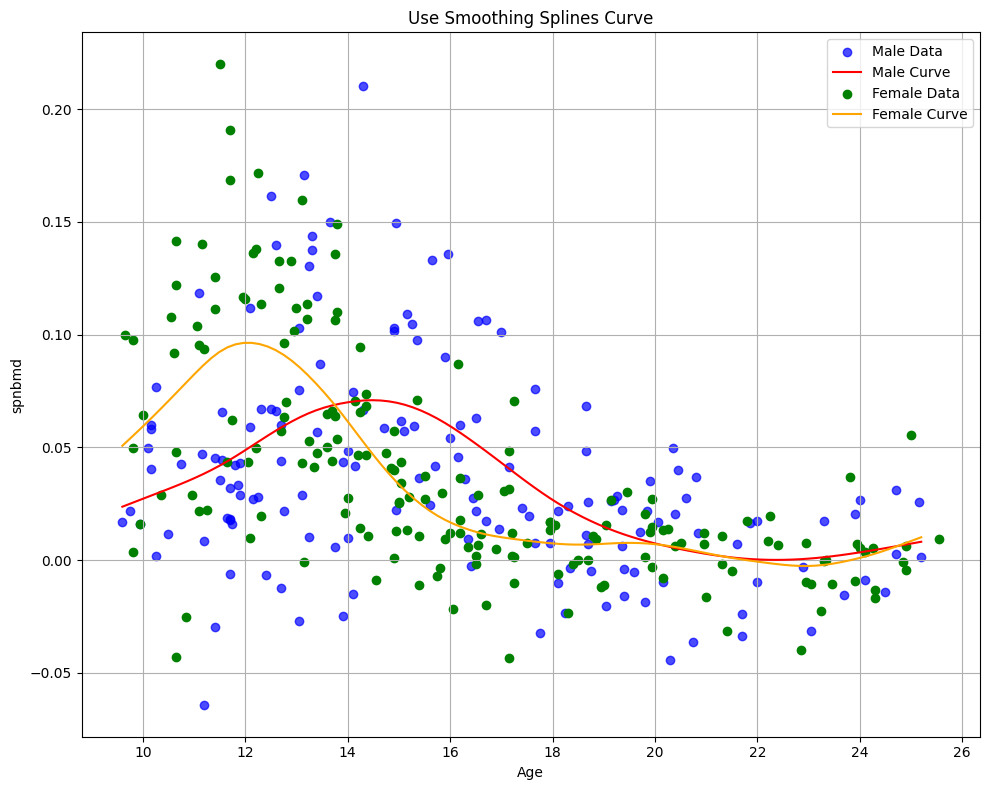

In [56]:
# Calculate estimated male and female curve values
y_male_pred = csaps(X_male_noise['age'], y_male_noise,
                              age_values, smooth=male_p)
y_female_pred = csaps(X_female_noise['age'], y_female_noise,
                                age_values, smooth=female_p)

# display the results
plt.figure(figsize=(10,8))

plt.scatter(X_male, y_male, alpha=0.7, label='Male Data', color='blue')
plt.plot(age_values, y_male_pred, label='Male Curve', color='red')

plt.scatter(X_female, y_female, label='Female Data', color='green')
plt.plot(age_values, y_female_pred, label='Female Curve', color='orange')

plt.xlabel('Age')
plt.ylabel('spnbmd')
plt.title('Use Smoothing Splines Curve')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

To select the best method, it depends on the specific characteristics of the data and the modeling goals. Polynomial features are suitable for capturing specific non-linear patterns, SplineTransformer provides flexibility with regularization, and smoothing splines offer a smooth fit with minimal feature engineering.


1. **Ridge Regression with Polynomial Features:**
   - **Advantages:**
     - This method is suitable for predicting in cases where data has multiple variables and there is a likelihood of high correlation among them.
     - Ridge Regression prevents the issue of assigning too much importance to one variable over others.
     - It makes the model more robust to noisy data and impurities.
     - Straightforward implementation.
     - Can capture complex relationships between features and target variable.
   - **Disadvantages:**
     - May lead to overfitting, especially if the degree of the polynomial is too high.
     - Sensitive to outliers.
     - The choice of the polynomial degree is crucial and requires tuning.
     - If the number of variables is large and many of them reasonably have a non-zero impact, Ridge Regression may significantly diminish their effects.

2. **Ridge Regression with SplineTransformer:**
   - **Advantages:**
     - Combining Ridge Regression with Spline Transformer can significantly enhance the flexibility of the model. So it is more flexible than polynomial features as it uses cubic splines.
     - Allows capturing non-linear relationships without explicitly selecting the degree.
     - Regularization helps in mitigating overfitting.
   - **Disadvantages:**
     - Still sensitive to outliers.
     - Adding information to the model may increase its complexity and training time.
     - The choice of hyperparameters, such as the smoothing parameter, needs careful tuning.

3. **Smoothing Spline:**
   - **Advantages:**
     - Provides a smooth and flexible fit to the data.
     - Does not require explicit feature engineering like polynomial features or spline transformers.
     - This method is well-suited for handling noisy data and can smoothly fit to the original data as much as possible.
   - **Disadvantages:**
     - May oversmooth the data if the smoothing parameter is too high, leading to loss of important details.
     - May not work well with highly irregular or non-uniformly sampled data.
     - Requires careful tuning of the smoothing parameter.

**Comparison the 3 methods:**
- **Flexibility:**
  - Polynomial features and SplineTransformer provide flexibility in capturing non-linear relationships but require careful parameter tuning.
  - Smoothing spline offers flexibility without the need for explicit feature engineering.

- **Robustness:**
  - Smoothing spline is often more robust to outliers due to its smooth nature.
  - Polynomial features and SplineTransformer can be sensitive to outliers, especially if the regularization is not strong enough.

- **Interpretability:**
  - Ridge regression with polynomial features may result in less interpretable models, especially with higher-degree polynomials.
  - Spline methods can provide a balance between flexibility and interpretability, but interpretation might still be challenging.

- **Computational Complexity:**
  - Ridge regression with polynomial features can be computationally expensive, especially with higher-degree polynomials.
  - Smoothing spline might be computationally efficient, depending on the algorithm used.

